The decay exponent associated to the soft regime is computed for a range of conductivtiy ratios and shape parameters. Convergence toward the predicted asymptotic behaviour is validated.

The analysis is carried out on the data generated with exp1.py.

In [ ]:
# Standard imports
import pathlib

# Third party imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors


# Internal imports

In [21]:
# set plot style
%matplotlib widget
plt.style.use('plot_style.txt')

# output path for figures 
output_path = pathlib.Path("/home/jonas/shared/Work/SSeep2026/Figures")

# load data
df_vGM = pd.read_csv('exp1_vGM/sl_it.csv', index_col=0)
df_BCB = pd.read_csv('exp1_BCB/sl_it.csv', index_col=0)

# color palettes
col_vGM = ['#79a6a6', '#48a1b4', '#0098c9', '#008adb', '#5375e0',
           '#9553cf']
cmap_vGM = colors.LinearSegmentedColormap.from_list('vGM', col_vGM)

col_BCB = ['#9ea678', '#a19958', '#a98a39', '#b5761f', '#c25e0f',
           '#cf3a15']
cmap_BCB = colors.LinearSegmentedColormap.from_list('BCB', col_BCB)

### Slope convergence

#### van Genuchten - Mualem

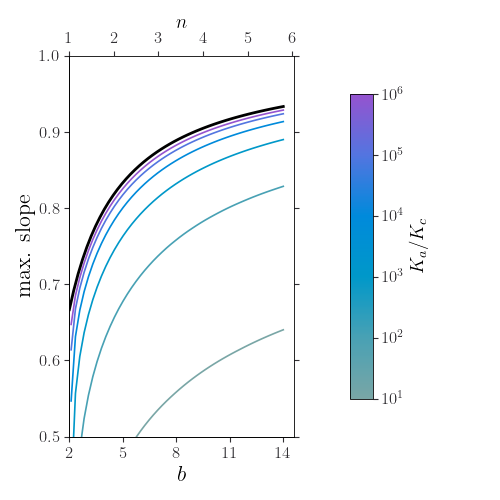

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))

# prediction
b = np.linspace(2, 14)
xi = b / (1 + b)
ax.plot(b, xi, c='k', lw=2, zorder=1)

# data
cond_ratio = df_vGM['cond_ratio'].unique()
norm = colors.LogNorm(vmin=cond_ratio[0], vmax=cond_ratio[-1])

for i, v in enumerate(cond_ratio):
    idx = df_vGM['cond_ratio'] == v
    ax.plot(df_vGM.loc[idx, 'b'], df_vGM.loc[idx, 'max_slope'],
            ls='-', c=col_vGM[i], zorder=0)
    
# ax layout
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=True, right=True)
ax.set(xscale='linear', yscale='linear')
ax.set_ylim(ymin=0.5, ymax=1)
ax.set_xlabel('$b$', fontsize=16)
ax.set_xticks([2, 5, 8, 11, 14])
ax.set_xlim(xmin=2)
ax.set_ylabel('max. slope', fontsize=16)

# set secondary x axes
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
xticklabels = [1, 2, 3, 4, 5, 6]
xticks = [(5 * n - 1) / 2 for n in xticklabels]
ax2.set_xticks(xticks, labels=xticklabels)
ax2.set_xlabel('$n$', labelpad=2)

# colorbar
cax = ax.inset_axes([1.25, 0.1, 0.1, 0.8])
cb = fig.colorbar(cm.ScalarMappable(cmap=cmap_vGM, norm=norm), cax=cax,
             orientation='vertical', label='$K_a / K_c$', ticks=cond_ratio)
cb.ax.minorticks_off()

plt.tight_layout()
#plt.savefig(output_path / f'slope_convergence_vGM.pdf')

#### Brooks - Corey- Burdine

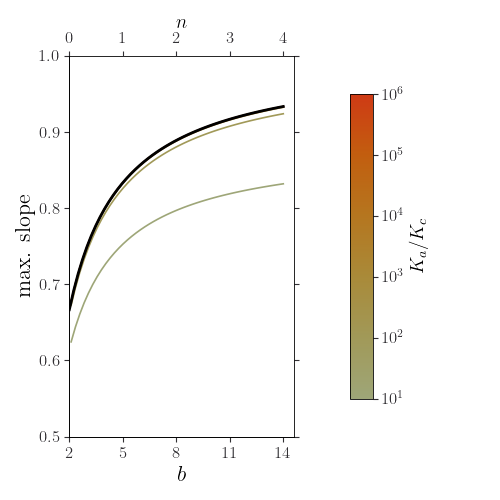

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))

# prediction
b = np.linspace(2, 14)
xi = b / (1 + b)
ax.plot(b, xi, c='k', lw=2, zorder=1)

# data
cond_ratio = df_BCB['cond_ratio'].unique()
norm = colors.LogNorm(vmin=cond_ratio[0], vmax=cond_ratio[-1])

for i, v in enumerate(cond_ratio):
    idx = df_BCB['cond_ratio'] == v
    ax.plot(df_BCB.loc[idx, 'b'], df_BCB.loc[idx, 'max_slope'],
            ls='-', c=col_BCB[i], zorder=0)
    
# ax layout
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=True, right=True)
ax.set(xscale='linear', yscale='linear')
ax.set_ylim(ymin=0.5, ymax=1)
ax.set_xlabel('$b$', fontsize=16)
ax.set_xticks([2, 5, 8, 11, 14])
ax.set_xlim(xmin=2)
ax.set_ylabel('max. slope', fontsize=16)

# set secondary x axes
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
xticklabels = [0, 1, 2, 3, 4]
xticks = [2 + 3 * lam for lam in xticklabels]
ax2.set_xticks(xticks, labels=xticklabels)
ax2.set_xlabel('$n$', labelpad=2)

# colorbar
cax = ax.inset_axes([1.25, 0.1, 0.1, 0.8])
cb = fig.colorbar(cm.ScalarMappable(cmap=cmap_BCB, norm=norm), cax=cax,
             orientation='vertical', label='$K_a / K_c$', ticks=cond_ratio)
cb.ax.minorticks_off()

plt.tight_layout()
#plt.savefig(output_path / f'slope_convergence_BCB.pdf')

### Interval extent

#### negligible to soft

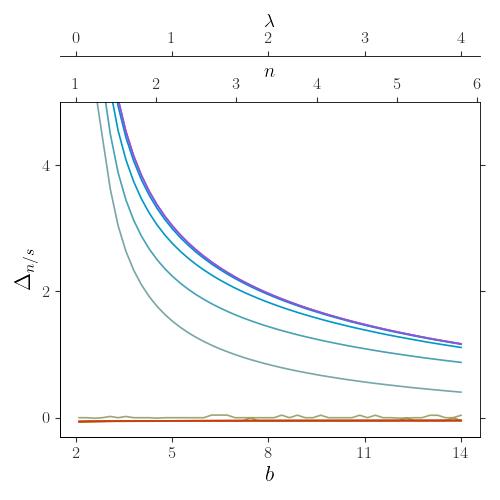

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

# data
cond_ratio = df_BCB['cond_ratio'].unique()
for i, v in enumerate(cond_ratio):
    idx = df_vGM['cond_ratio'] == v
    ax.plot(df_vGM.loc[idx, 'b'], df_vGM.loc[idx, 'delta_ns'],
            ls='-', c=col_vGM[i], zorder=0)
    
    idx = df_BCB['cond_ratio'] == v
    ax.plot(df_BCB.loc[idx, 'b'], df_BCB.loc[idx, 'delta_ns'],
            ls='-', c=col_BCB[i], zorder=0)
    
# ax layout
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=False, right=True)
ax.set(xscale='linear', yscale='linear')
ax.set_ylim(ymin=-0.3, ymax=5)
ax.set_yticks([0, 2, 4])
ax.set_xlabel('$b$', fontsize=16)
ax.set_xticks([2, 5, 8, 11, 14])
ax.set_ylabel('$\\Delta_{n/s}$', fontsize=16)

# set secondary x axes
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
xticklabels = [1, 2, 3, 4, 5, 6]
xticks = [(5 * n - 1) / 2 for n in xticklabels]
ax2.set_xticks(xticks, labels=xticklabels)
ax2.set_xlabel('$n$', labelpad=0)

ax3 = ax.twiny()
ax3.set_xlim(ax.get_xlim())
xticklabels = [0, 1, 2, 3, 4]
xticks = [2 + 3 * lam for lam in xticklabels]
ax3.set_xticks(xticks, labels=xticklabels)
ax3.set_xlabel('$\\lambda$', labelpad=2)
ax3.spines['top'].set_position(('outward', 33))
ax3.spines['top'].set_visible(True)

plt.tight_layout()
#plt.savefig(output_path / "interval_ns.svg")

#### Soft to hard

/tmp/ipykernel_64605/1127780996.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5, 5))


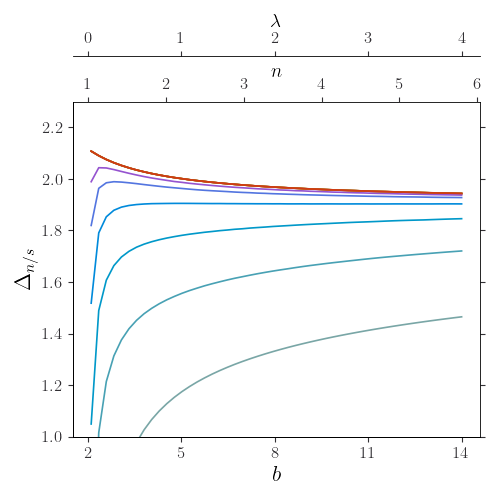

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))

# data
cond_ratio = df_BCB['cond_ratio'].unique()
for i, v in enumerate(cond_ratio):
    idx = df_vGM['cond_ratio'] == v
    ax.plot(df_vGM.loc[idx, 'b'], df_vGM.loc[idx, 'delta_sh'],
            ls='-', c=col_vGM[i], zorder=0)
    
    idx = df_BCB['cond_ratio'] == v
    ax.plot(df_BCB.loc[idx, 'b'], df_BCB.loc[idx, 'delta_sh'],
            ls='-', c=col_BCB[i], zorder=0)
    
# ax layout
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=False, right=True)
ax.set(xscale='linear', yscale='linear')
ax.set_ylim(ymin=1, ymax=2.3)
ax.set_xlabel('$b$', fontsize=16)
ax.set_xticks([2, 5, 8, 11, 14])
ax.set_ylabel('$\\Delta_{n/s}$', fontsize=16)

# set secondary x axes
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
xticklabels = [1, 2, 3, 4, 5, 6]
xticks = [(5 * n - 1) / 2 for n in xticklabels]
ax2.set_xticks(xticks, labels=xticklabels)
ax2.set_xlabel('$n$', labelpad=0)

ax3 = ax.twiny()
ax3.set_xlim(ax.get_xlim())
xticklabels = [0, 1, 2, 3, 4]
xticks = [2 + 3 * lam for lam in xticklabels]
ax3.set_xticks(xticks, labels=xticklabels)
ax3.set_xlabel('$\\lambda$', labelpad=2)
ax3.spines['top'].set_position(('outward', 33))
ax3.spines['top'].set_visible(True)

plt.tight_layout()
#plt.savefig(output_path / "interval_sh.svg")